In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from dotenv import load_dotenv

In [75]:
load_dotenv()
db_host = os.environ.get('DB_HOST')
db_port = os.environ.get('DB_PORT')
db_name = os.environ.get('DB_NAME')
db_user = os.environ.get('DB_USER')
db_pass = os.environ.get('DB_PASS')
db_conn_uri = f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}'

In [76]:
df = pd.read_sql("SELECT * FROM song;", db_conn_uri)

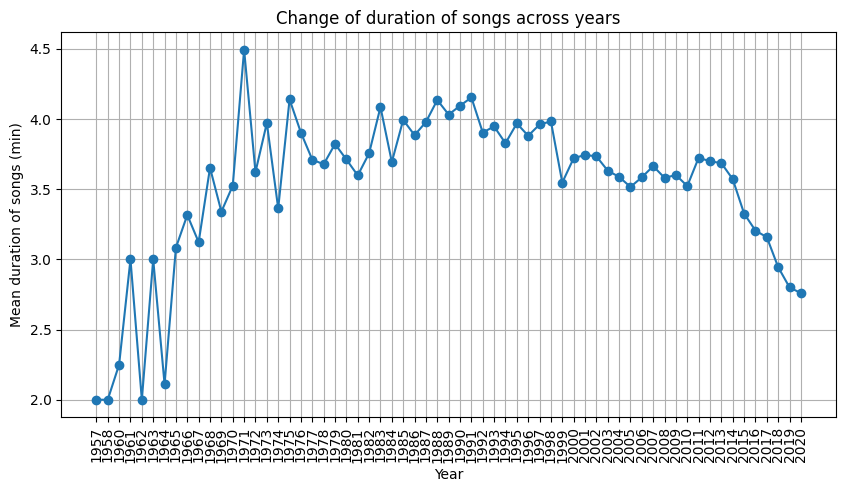

In [77]:
df_grouped = df.groupby("track_year")["duration_fullmin"].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_grouped["track_year"], df_grouped["duration_fullmin"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Mean duration of songs (min)")
plt.xticks(rotation=90)
plt.title("Change of duration of songs across years")
plt.grid()
plt.show()

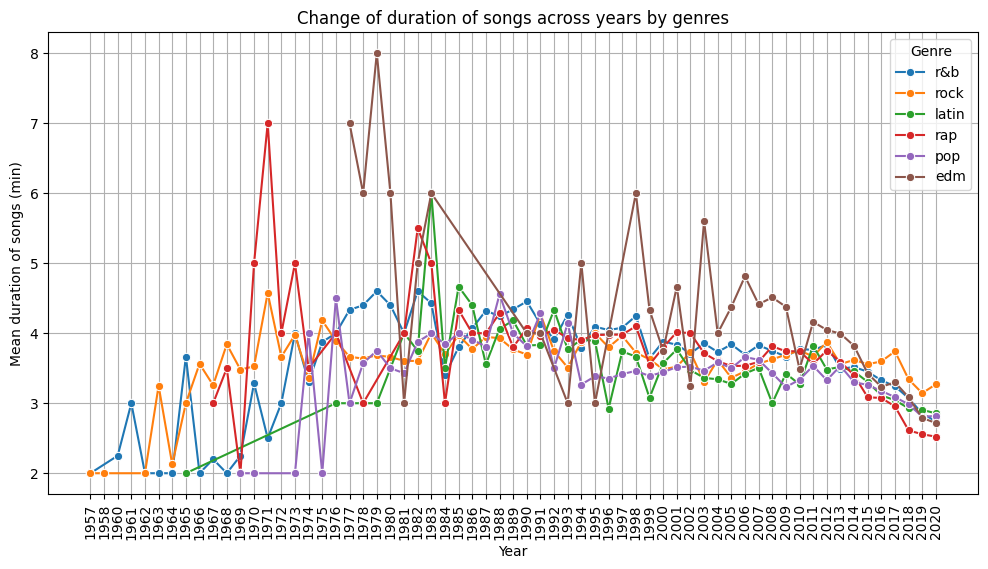

In [78]:
df_grouped = df.groupby(["track_year", "playlist_genre"])["duration_fullmin"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="track_year", y="duration_fullmin", hue="playlist_genre", marker="o")
plt.xlabel("Year")
plt.ylabel("Mean duration of songs (min)")
plt.xticks(rotation=90)
plt.title("Change of duration of songs across years by genres")
plt.legend(title="Genre")
plt.grid()
plt.show()

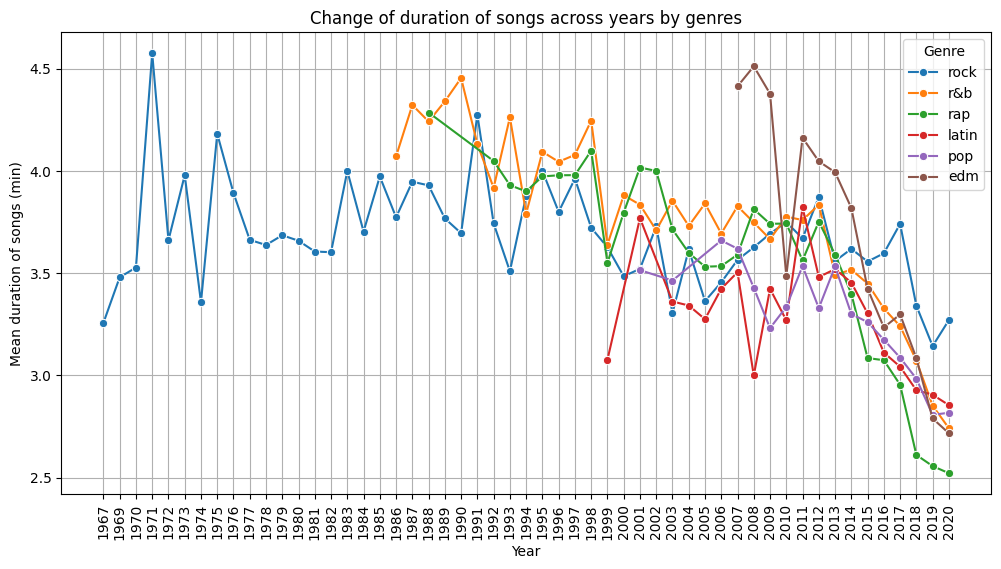

In [79]:
df_grouped = df.groupby(["track_year", "playlist_genre"])["duration_fullmin"].agg(["mean", "count"]).reset_index()
df_filtered = df_grouped[df_grouped["count"] > 25].reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="track_year", y="mean", hue="playlist_genre", marker="o")
plt.xlabel("Year")
plt.ylabel("Mean duration of songs (min)")
plt.xticks(rotation=90)
plt.title("Change of duration of songs across years by genres")
plt.legend(title="Genre")
plt.grid()
plt.show()

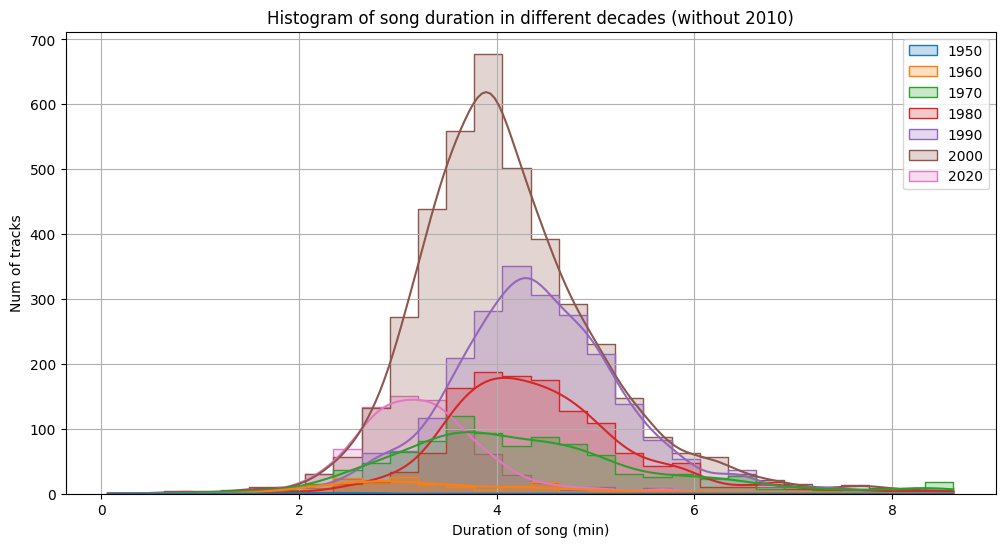

In [85]:
plt.figure(figsize=(12, 6))
df_filtered = df[df["track_decade"] != 2010]
ax = sns.histplot(df_filtered, x="duration_min", hue="track_decade", bins=30, element="step", palette="tab10", kde=True, legend=True)
ax.get_legend().set_title("")
plt.xlabel("Duration of song (min)")
plt.ylabel("Num of tracks")
plt.title("Histogram of song duration in different decades (without 2010)")
plt.grid()
plt.show()

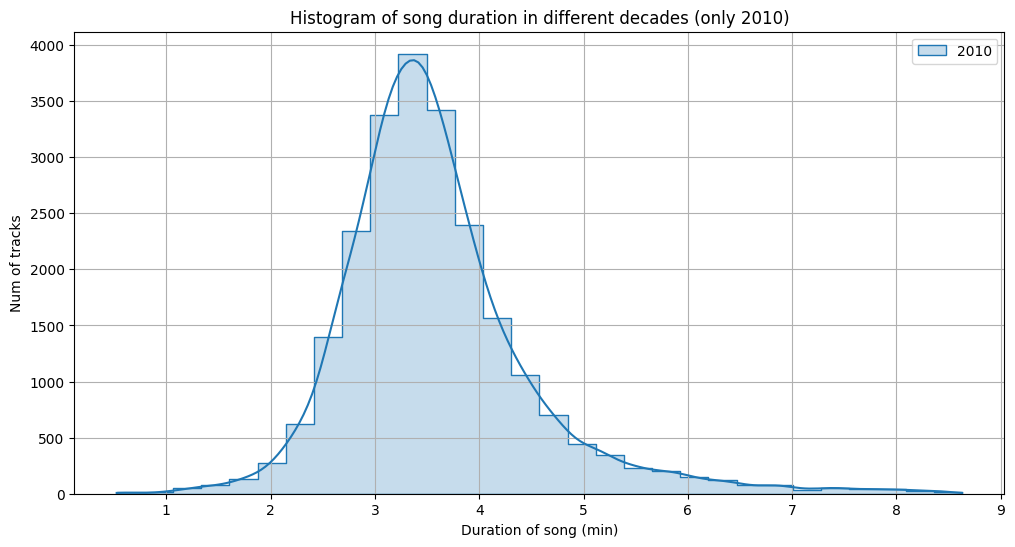

In [84]:
plt.figure(figsize=(12, 6))
df_filtered = df[df["track_decade"] == 2010]
ax = sns.histplot(df_filtered, x="duration_min", hue="track_decade", bins=30, element="step", palette="tab10", kde=True, legend=True)
ax.get_legend().set_title("")
plt.xlabel("Duration of song (min)")
plt.ylabel("Num of tracks")
plt.title("Histogram of song duration in different decades (only 2010)")
plt.grid()
plt.show()

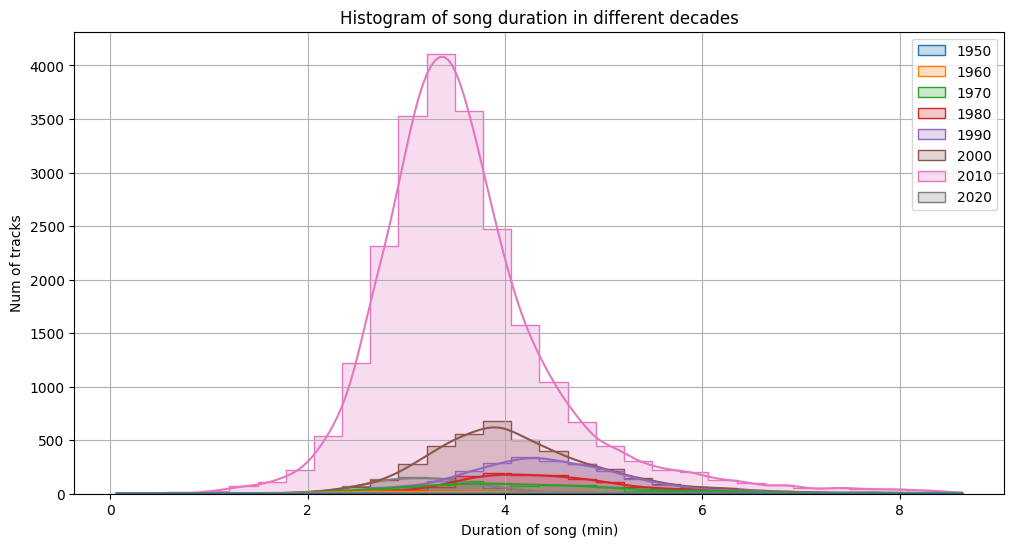

In [83]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df, x="duration_min", hue="track_decade", bins=30, element="step", palette="tab10", kde=True, legend=True)
ax.get_legend().set_title("")
plt.xlabel("Duration of song (min)")
plt.ylabel("Num of tracks")
plt.title("Histogram of song duration in different decades")
plt.grid()
plt.show()